## Lexicon data exploratory Analysis

In [1]:
import pandas as pd
import altair as alt
import numpy as np

import re
import unicodedata
from collections import Counter 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

import unicodedata

def unicode_filter(string):
    string = string.replace(u' \u200f','')
    string = string.replace(u'\u200f','')
    
    return string

alt.data_transformers.disable_max_rows()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/roberta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DataTransformerRegistry.enable('default')

In [2]:
lexicons = ['Outrage','Vagueness','Argumentation','Modalization',
            'Valuation','Sentiment','Presupposition','Ambiental','rt_auto', 'ra_auto', 'rp_auto',
            'armas_auto', 'racismo_auto']
agg_dict = {'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'}
features = lexicons

In [5]:
df = pd.read_csv('~/Documentos/discursos-twitter/ht_arm_rac_2019-01-01_to_2021-02-22.csv',lineterminator='\n')
# df = df[df.Vagueness > 0.025]
# df = df[df.Outrage > 0.025]
df[features] = (df[features] - df[features].mean()) / df[features].std()
df['username'] = df['username'].apply(unicode_filter)
df['len_tweet'] = df['text'].str.split().apply(len)
df = df.dropna(subset=['Ambiental'])
df#.to_csv("../data/ht_2019-01-01_to_2020-09-07_governo2.csv",index=False)

index                   id  id_parlamentar    casa  \
1              1  1357019439326183424          204379  câmara   
2              2  1357018959879536640          204379  câmara   
3              3  1357017482431778818          204379  câmara   
4              4  1350891698851897344          204379  câmara   
5              5  1340807316577333250          204379  câmara   
...          ...                  ...             ...     ...   
1242399  1242399  1224665701497131008               0       -   
1242400  1242400  1224650603512651777               0       -   
1242401  1242401  1224509010839310338               0       -   
1242402  1242402  1224485366595510273               0       -   
1242403  1242403  1224445226065920005               0       -   

          nome_eleitoral     partido  uf       username  created_at  \
1         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
2         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
3         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-02-03   
4         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2021-01-17   
5         ACÁCIO FAVACHO        PROS  AP  acaciofavacho  2020-12-20   
...                  ...         ...  ..            ...         ...   
1242399  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242400  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242401  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242402  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-04   
1242403  Monica de Bolle  INFLUENCER   -      @bollemdb  2020-02-03   

                                                      text  ...  Valuation  \
1        Estamos na 56° legislatura e pela primeira vez...  ...   1.109234   
2        Saúdo tbm os eleitos para a Mesa, deputados: A...  ...  -1.260798   
3        Parabenizo e desejo sucesso aos novos presiden...  ...  -0.195239   
4        Notícia tanto aguardada: Duas vacinas aprovada...  ...   0.653722   
5        Muitos são os desafios. Imensa é nossa luta pa...  ...   0.608161   
...                                                    ...  ...        ...   
1242399  When Brazilian official agencies use social me...  ...  -1.161977   
1242400  @fiori_anita @petracostal O comentário sexista...  ...  -0.708909   
1242401              @betomiranda @petracostal Exatamente.  ...   0.714047   
1242402                 @juzinhapersonal @petracostal Não.  ...   2.142094   
1242403  Depois dessa vou torcer muito por Democracia e...  ...   0.537326   

         Sentiment  Presupposition  Ambiental   rt_auto   ra_auto   rp_auto  \
1         0.154600        0.932111   0.047014  0.663040  0.500392  0.831275   
2        -0.870140       -2.008348  -1.149309  0.429540  0.947992  0.729624   
3        -1.004945       -0.768929  -0.532733  0.807676  1.478826  1.102921   
4        -0.301798        0.314928   0.793293 -0.178546 -0.306937  0.066632   
5        -0.586694        0.166027   1.363232 -0.068999  0.060989  0.550310   
...            ...             ...        ...       ...       ...       ...   
1242399  -1.356238       -1.712982  -1.450840 -1.985637 -1.905470 -1.420503   
1242400   0.751963       -0.799476  -1.633531 -1.533527 -2.021905 -1.749596   
1242401   1.092393        1.378581  -0.648565 -1.782434 -1.995289 -1.677869   
1242402   1.214427        1.511317  -0.564566 -1.053707 -0.589377 -0.322279   
1242403   0.424693        0.427793  -0.308307 -0.055739 -0.368895  0.001049   

         armas_auto  racismo_auto  len_tweet  
1          0.568895      1.403879         36  
2         -0.482378     -1.551987         37  
3          0.375037     -0.923737         20  
4          0.002258      0.139750         36  
5          0.083735      1.386261         21  
...             ...           ...        ...  
1242399   -1.566262     -1.471327         25  
1242400   -2.006979      1.504078          9  
1242401   -1.803816      1.078224          3  
1242402    0.159593  

In [6]:
temas = []
for _, row in df.iterrows():
    maxi = max([row.Ambiental, row.rt_auto, row.ra_auto, row.rp_auto, row.armas_auto, row.racismo_auto])
#     if maxi> 1.5:
#         print(maxi)
    if maxi < 1.5:
        temas.append(0)
    elif row.Ambiental == maxi:
        temas.append(1)
    elif row.rt_auto == maxi:
        temas.append(2)
    elif row.ra_auto == maxi:
        temas.append(3)
    elif row.rp_auto == maxi:
        temas.append(4)
    elif row.armas_auto == maxi:
        temas.append(5)
    elif row.racismo_auto == maxi:
        temas.append(6)
df["tema"] = temas

### Número de tweets por partido

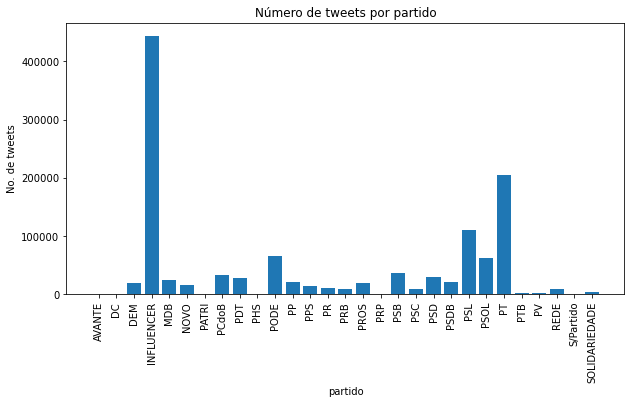

In [6]:
bar = df.groupby(by=['partido']).count()[['index']]
bar_vals = bar.index.values
bar_cols = bar['index'].values


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot

plt.bar(bar_vals, bar_cols)
 
plt.xlabel("partido")
plt.ylabel("No. de tweets")
plt.title("Número de tweets por partido")
plt.xticks(rotation=90)
plt.show()

### Calcula Trending Topics

In [7]:

def readFuncWords():
    stop_words = set(stopwords.words("portuguese"))
    stop_words.update(['que', 'ate', 'esse', 'de', 'do','essa', 'pro', 'pra', 'oi', 'la','nao','brasil','bolsonaro','sobre','governo','ja','vai','hoje','so','voce','sao','vc','ser','covid','19','uol','uolnoticias'])
    return stop_words

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def regex_links(s):
    s = re.sub("(Http|Https|http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?"," ",s)
    return s

def preprocess_sentence(w):
    w = regex_links(w)
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z0-9#$]+", " ", w)

    w = w.rstrip().strip()

    w = ' ' + w + ' '
    return w

trend_list=[]
def create_trends(data,topk=10):
    '''Takes a DataFrame grouped by day, and create a set of most frequent words for each day'''
    func_tokens = readFuncWords()
    full_text = preprocess_sentence(' '.join(data['text'].to_list())).split()
    full_text = [w for w in full_text if len(w) > 1]
    full_text_clean = [w for w in full_text if w not in func_tokens]
    counter = Counter(full_text_clean)
    out1 = list(list(zip(*counter.most_common(topk)))[0])
    bigrams = zip(full_text_clean, full_text_clean[1:])
    counts = Counter(bigrams)
    out2 = list(list(zip(*counts.most_common(topk)))[0])
    out2 = [" ".join(tuple_) for tuple_ in out2]
    out=', '.join(out1+out2)
    for _ in range(len(data)):
        trend_list.append(out)

trends = df.copy()
trends.index = pd.to_datetime(trends['created_at'])
trends.groupby([trends.index.year, trends.index.month, trends.index.day]).apply(create_trends)
df = df.sort_values(by=['created_at'])
df['trending'] = trend_list

trend_partido_list = []
def create_trends_partido(data, minimum=10):
    '''Takes a DataFrame grouped by day, and create a set of most frequent words for each day'''
    if (len(data) < minimum):
        for _ in range(len(data)):
            trend_partido_list.append('Not enough data.')
        return
    func_tokens = readFuncWords()
    full_text = preprocess_sentence(' '.join(data['text'].to_list())).split()
    full_text = [w for w in full_text if len(w) > 1]
    full_text_clean = [w for w in full_text if w not in func_tokens]
    counter = Counter(full_text_clean)
    out1 = list(list(zip(*counter.most_common(5)))[0])
    bigrams = zip(full_text_clean, full_text_clean[1:])
    counts = Counter(bigrams)
    out2 = list(list(zip(*counts.most_common(5)))[0])
    out2 = [" ".join(tuple_) for tuple_ in out2]
    out=', '.join(out1+out2)
    for _ in range(len(data)):
        trend_partido_list.append(out)

trends = df.copy()
trends.index = pd.to_datetime(trends['created_at'])
trends.groupby([trends.index.year, trends.index.month, trends.index.day, trends.partido]).apply(create_trends_partido)
df['data'] = pd.to_datetime(df['created_at']).dt.date
df = df.sort_values(by=['data','partido'])
df['trending_partido'] = trend_partido_list
df = df.drop(['data'], axis=1)
del(trends)

### Número de tweets ao longo do tempo

In [21]:
def plot_num_tweets_trajectory(df = df):
    parl = df[df.partido != 'INFLUENCER'].copy()
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq='W')).agg({'Outrage':'count','trending':'first'})
    gr = gr[['Outrage','trending']].reset_index()
    chart = alt.Chart(gr[gr.date > '2019-01-01']).transform_fold(
        ['Outrage'],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        tooltip=['trending','date']
    ).properties(height=300, width=1000)
    return chart
plot_num_tweets_trajectory()

alt.Chart(...)

### Variação dos léxicos de um parlamentar ao longo do tempo

In [8]:
def plot_trajectory_week(parlamentar,lex_list,freq='W', df = df):
    parl = df[df.username==parlamentar].copy()
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq=freq)).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    gr = gr[lexicons+['trending','trending_partido']].reset_index()
    chart = alt.Chart(gr[gr.date > '2020-01-01']).transform_fold(
        lex_list,
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='lexicon:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart

lex_list = ['racismo_auto','armas_auto']
plot_trajectory_week('bolsonarosp',lex_list, freq='W')

alt.Chart(...)

### Variação de um léxico por partido ao longo do tempo

In [50]:
def lex_partido(lista_partidos,lexico,start_date,end_date='2021-02-22',df=df):
    partidos = df[df.partido.isin(lista_partidos)].copy()
    partidos['len_tweet'] = partidos['text'].str.split().apply(len)
    partidos = partidos[partidos.len_tweet > 10]
    partidos.index = pd.to_datetime(partidos['created_at'])
    partidos = partidos.groupby([partidos.index.year, partidos.index.month,partidos.index.day, partidos.partido]).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    partidos.index.names = ['year','month','day','partido']
    partidos = partidos[lexicons+['trending','trending_partido']].reset_index()
    partidos['date']=pd.to_datetime(partidos[['year', 'month','day']],infer_datetime_format=True)
    partidos = partidos[partidos.date > start_date]
    partidos = partidos[partidos.date <= end_date]


    chart = alt.Chart(partidos).transform_window(
    Vagueness ='mean(Vagueness)',
    Outrage ='mean(Outrage)',
    Argumentation ='mean(Argumentation)',
    Modalization ='mean(Modalization)',
    Valuation ='mean(Valuation)',
    Sentiment ='mean(Sentiment)',
    Presupposition ='mean(Presupposition)',
    Ambiental = 'mean(Ambiental)',
    rt_auto='mean(rt_auto)',
    ra_auto='mean(ra_auto)',
    rp_auto='mean(rp_auto)',
    armas_auto='mean(armas_auto)',
    racismo_auto='mean(racismo_auto)',
    frame=[-7, 0],
    groupby = ['partido'],
).mark_line(point=True).encode(
    x='date:T',
    y= alt.Y( lexico+':Q', scale = alt.Scale(zero=False)),
    color='partido:N',
    tooltip=['trending','trending_partido','date']
).properties(height=300, width=3000)

    return chart


lista_partidos = ['PSDB','PL','PSOL','PT','NOVO','PSL','MDB'] # PSB, DEM, PP
lex_partido(lista_partidos,'Outrage','2019-01-01')#.save('seq_out.html')

alt.Chart(...)

### Trajetória de um léxico para múltiplos parlamentares

In [23]:
def plot_trajectory_multiple(parlamentares,lexicon, df = df):
    bolso = df[df.username.isin(parlamentares)]
    bolso.index = pd.to_datetime(bolso['created_at'])
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day,bolso.username]).agg(agg_dict)
    bolso.index.names = ['year','month','day','username']
    bolso = bolso[lexicons+['trending','trending_partido']].reset_index()
    bolso['date']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    chart = alt.Chart(bolso[bolso.date > '2020-01-01'], title="Valuation").transform_fold(
        [lexicon],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['username'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='username:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart

lexicon="Modalization"
plot_trajectory_multiple(['bolsonarosp','RodrigoMaia','MarceloFreixo'],lexicon)

alt.Chart(...)

In [20]:
plot_trajectory_multiple(['bolsonarosp','RodrigoMaia','MarceloFreixo'],lexicon).save('Vagueness.html')

In [ ]:
def lex_parlamentar_by_id(lista_parlamentar,lexico,start_date,df=df):
    parlamentar = df[df.id_parlamentar.isin(lista_parlamentar)]
    parlamentar = parlamentar[parlamentar.created_at > start_date]
    parlamentar['len_tweet'] = parlamentar['text'].str.split().apply(len)
    parlamentar = parlamentar[parlamentar.len_tweet > 10]
    parlamentar.index = pd.to_datetime(parlamentar['created_at'])
    parlamentar = parlamentar.groupby([parlamentar.index.year, parlamentar.index.month, parlamentar.index.day, parlamentar.nome_eleitoral]).agg(agg_dict)
    parlamentar.index.names = ['year','month','day','nome_eleitoral']
    parlamentar = parlamentar[lexicons+['trending','trending_partido']].reset_index()
    parlamentar['date']=pd.to_datetime(parlamentar[['year', 'month','day']],infer_datetime_format=True)


    chart = alt.Chart(parlamentar).transform_window(
    Vagueness ='mean(Vagueness)',
    Outrage ='mean(Outrage)',
    Argumentation ='mean(Argumentation)',
    Modalization ='mean(Modalization)',
    Valuation ='mean(Valuation)',
    Sentiment ='mean(Sentiment)',
    Presupposition ='mean(Presupposition)',
    Ambiental = 'mean(Ambiental)',
    rt_auto='mean(rt_auto)',
    ra_auto='mean(ra_auto)',
    rp_auto='mean(rp_auto)',
    armas_auto='mean(armas_auto)',
    racismo_auto='mean(racismo_auto)',
    frame=[-7, 0],
    groupby = ['nome_eleitoral'],
).mark_line(point=True).encode(
    x='date:T',
    y= alt.Y( lexico+':Q', scale = alt.Scale(zero=False)),
    color='nome_eleitoral:N',
    tooltip=['trending','trending_partido','date']
).properties(height=300, width=1000)

    return chart

def upper(string):
    return string.upper()

comissao_reforma = pd.read_csv("../data/propositions/comissao_mista_ref_tributaria.csv")
ids = comissao_reforma.id.values.tolist()
lex_parlamentar_by_id(ids[0:5],'Outrage','2020-04-01')

### Barplot léxicos

In [130]:
def plot_avg_lexicon_partidos(lexicon,df=df):
    avg_partidos = df.groupby(by='partido').mean().sort_values(by=[lexicon],ascending = False)
    partidos = avg_partidos.index.to_list()
    lex = avg_partidos[lexicon].to_list()


    source = pd.DataFrame({
        'partido': partidos,
        lexicon: lex
    })
    chart = alt.Chart(source).mark_bar().encode(
        x= alt.X('partido',sort=None),
        y=lexicon,
    ).properties(
        width=400,
        height=400
    )
    return chart
plot_avg_lexicon_partidos('Outrage')

alt.Chart(...)

In [131]:
def plot_avg_lexicon_parl(lexicon,df=df):
    avg_parl = df.groupby(by='nome_eleitoral').mean().sort_values(by=[lexicon],ascending = False).head(10)
    partidos1 = avg_parl.index.to_list()
    ambiental1 = avg_parl[lexicon].to_list()
    avg_parl = df.groupby(by='nome_eleitoral').mean().sort_values(by=[lexicon],ascending = True).head(10).sort_values(by=[lexicon],ascending = False)
    partidos1 += avg_parl.index.to_list()
    ambiental1 += avg_parl[lexicon].to_list()


    source = pd.DataFrame({
        'Parlamentar': partidos1,
        lexicon: ambiental1
    })
    chart = alt.Chart(source).mark_bar().encode(
        x= alt.X('Parlamentar',sort=None),
        y=lexicon,
    ).properties(
        width=400,
        height=400
    )
    return chart

plot_avg_lexicon_parl('Outrage')

alt.Chart(...)

### Influencers vs Parlamentares

In [132]:
def inf_or_parl(string):
    if string == 'INFLUENCER':
        return 'INFLUENCER'
    else:
        return 'PARLAMENTAR' 

def plot_trajectory_inf_parl(lexicon,df = df):
    df['inf_x_parl'] = df.partido.apply(inf_or_parl)
    bolso = df
    #print(df.inf_x_parl)
    bolso.index = pd.to_datetime(bolso['created_at'])
    bolso = bolso.groupby([bolso.index.year, bolso.index.month,bolso.index.day,bolso.inf_x_parl]).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    bolso.index.names = ['year','month','day','inf_parl']
    bolso = bolso[lexicons+['trending','trending_partido']].reset_index()
    #print(bolso)
    bolso['date']=pd.to_datetime(bolso[['year', 'month','day']],infer_datetime_format=True)
    chart = alt.Chart(bolso[bolso.date > '2020-01-01']).transform_fold(
        [lexicon],
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['inf_parl'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='inf_parl:N',
        tooltip=['trending','trending_partido','date']
    ).properties(height=300, width=1000)
    return chart

lexicon = "armas_auto"
plot_trajectory_inf_parl(lexicon)

alt.Chart(...)

### Léxico vs. Léxico

In [112]:
def plot_trajectory_month(lex_list,df = df):
    parl = df
    parl['date'] = pd.to_datetime(parl['created_at'])
    gr = parl.groupby(pd.Grouper(key='date',freq='W')).agg({'Outrage':'mean','Vagueness':'mean','Argumentation':'mean','Modalization':'mean','Valuation':'mean','Sentiment':'mean','Presupposition':'mean',"Ambiental":"mean","rt_auto":"mean","ra_auto":'mean','rp_auto':"mean",'armas_auto':'mean','racismo_auto':'mean','trending':'first','trending_partido':'first'})
    gr = gr[lexicons+['trending','trending_partido']].reset_index()
    chart = alt.Chart(gr[gr.date > '2019-01-01']).transform_fold(
        lex_list,
        as_=['lexicon','value'],
    ).transform_window(
        value ='mean(value)',
        frame=[-7, 0],
        groupby = ['lexicon'],
    ).mark_line(point=True).encode(
        x='date:T',
        y= alt.Y('value:Q', scale = alt.Scale(zero=False)),
        color='lexicon:N',
        tooltip=['trending','date']
    ).properties(height=300, width=1000)
    return chart

lex_list = ['racismo_auto','armas_auto']
plot_trajectory_month(lex_list)
#a.save("armas_racismo.html")

alt.Chart(...)

### Scatterplot Léxico vs. Léxico

In [113]:
partidos = ['PSDB','PL','PSOL','PT','NOVO','PSL','MDB']

partidos_importantes = []
for _, row in df.iterrows():
    if row.partido in partidos:
        partidos_importantes.append(partidos.index(row.partido)+1)
    else:
        partidos_importantes.append(0)
df["partidos_imp"] = partidos_importantes

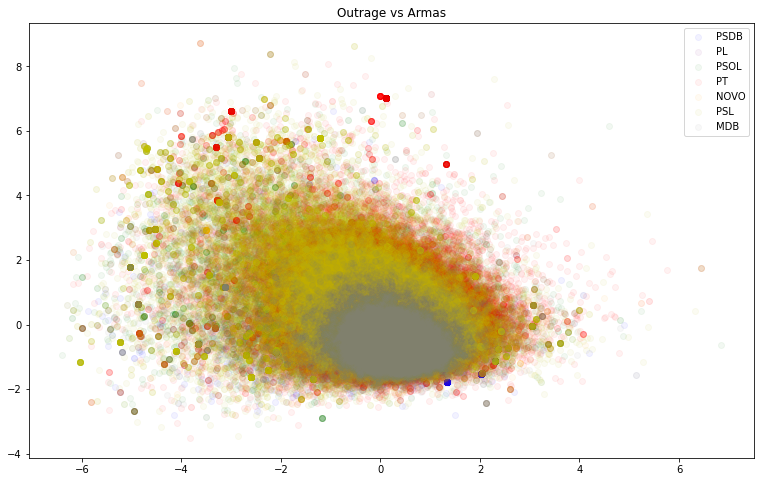

In [116]:
X_2d = df[["armas_auto",'Outrage']].values
y = df['partidos_imp'].values

fig = plt.figure(figsize=(13, 8))

target_ids = range(1,len(partidos)+1)
colors =  'blue','purple','g','red','orange','y','grey'
for i, c, label in zip(target_ids, colors, partidos):
    plt.scatter(X_2d[np.squeeze(y == i), 0], X_2d[np.squeeze(y == i), 1], c=c, label=label, alpha=0.05)
# for word, (x,y) in zip(nomes, X_2d):
#         plt.text(x+0.005, y+0.005, word,fontsize='xx-small')
plt.legend()
plt.title("Outrage vs Armas")
plt.show()
#fig.savefig("tsne_temasss.png")